<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Project 1 Rubric

### Requirements

1. You need to perform an exhaustive exploration of your dataset.
2. Your code must show command and understanding of Python (Codeacademy and class 1,2,3 notes)
3. You need to define functions (no matter how complicated they are)
4. You don't need to do any modeling

    1. Load and clean, if neccessary, the data with pandas.
    2. Describe the data and investigate any outliers.
    3. Explore relationships between the variables.
    4. Visualize at least five variables of your choice with appropriate visualizations. They should be readable.
    5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. 

5. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.

In [73]:
#IMPORT PACKAGES
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# For plotting 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# TO make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [74]:
# I import the dataset
df=pd.read_csv ('/home/dsi-student/Desktop/ECON628-01-berenger92/datasets/my_dataset_class (1).csv')

In [75]:
# I want to see how many rows and columns does the dataset has
print df.shape
## I want to see the type and missing values if there is any
print df.info()

(4443, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4443 entries, 0 to 4442
Data columns (total 43 columns):
hhid                     4443 non-null int64
psu                      4443 non-null int64
year                     4443 non-null int64
region                   4443 non-null int64
hhsize                   4443 non-null int64
hhexp                    4381 non-null float64
pcexp                    4381 non-null float64
land_ownership           4443 non-null int64
land_area                4443 non-null float64
TLU_total                4443 non-null float64
thhagasset               4443 non-null int64
wealth                   4443 non-null float64
femhead                  4443 non-null int64
agehead                  4443 non-null int64
educave                  4443 non-null float64
educhead                 4443 non-null int64
d_mobile                 4443 non-null int64
d_computer               4443 non-null int64
d_internet               4443 non-null int64
income_tot     

In [76]:
# Since my data is unbalanced panel, I have 4443 observations, and 43 variables. 

In [77]:
df.describe()

,hhid,psu,year,region,hhsize,hhexp,pcexp,land_ownership,land_area,TLU_total,...,extra_temp_max29,modern_inputs_1,ln_farmsize,ln_areacultiv,ln_educ,ln_hhsize,ln_total_livstocksize,crop_residue,organic_fertil,ag_exten
count,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4.381000e+03,4.381000e+03,4443.000000,4443.000000,4443.000000,...,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000
mean,11127.135719,111.180734,2012.421337,4.547828,6.755571,1.261848e+06,2.303187e+05,0.700878,6.990427,1.103302,...,109.829665,0.236102,1.537828,1.019024,0.347802,1.955863,0.525757,0.353140,0.507315,0.180059
std,5462.417925,54.625255,1.498105,1.873930,3.407970,8.236323e+05,1.348085e+05,0.457925,18.368963,2.209134,...,17.015750,0.424733,0.848825,0.911566,0.850786,0.436054,0.568747,0.477999,0.500003,0.384279
min,702.000000,7.000000,2011.000000,1.000000,1.000000,1.264792e+05,3.693893e+04,0.000000,0.000000,0.000000,...,69.072937,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000
25%,6711.000000,67.000000,2011.000000,3.000000,4.000000,NaN,NaN,0.000000,1.575300,0.000000,...,98.036865,0.000000,0.945966,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000
50%,11205.000000,112.000000,2011.000000,5.000000,6.000000,NaN,NaN,1.000000,3.531100,0.500000,...,108.653760,0.000000,1.510965,1.040665,0.000000,1.945910,0.405465,0.000000,1.000000,0.000000
75%,15217.500000,152.000000,2014.000000,6.000000,8.000000,NaN,NaN,1.000000,6.555250,1.300000,...,120.199070,0.000000,2.022243,1.727816,0.000000,2.197225,0.832909,1.000000,1.000000,0.000000
max,27012.000000,270.000000,2014.000000,8.000000,30.000000,7.899254e+06,2.762882e+06,1.000000,208.750810,34.550003,...,176.972290,1.000000,5.345920,4.659837,2.995732,3.433987,3.570940,1.000000,1.000000,1.000000


We can see from the output that some variables (per capita expenditures: pcexp, and hh expenditures:hhexp) contain missing values. We will replace the dummy variables missing values by 0, and the continuous variables by their mean per year.in their cluster.

In [78]:
#I want to see specifically the observations that are missing for per capita expenditure variable pcexp
df.loc[df['pcexp'].isnull()].T

,51,55,108,114,222,281,288,435,437,480,...,3896,3939,3951,3956,3973,4079,4118,4178,4258,4295
hhid,1216.000000,1.218000e+03,1702.000000,1.706000e+03,2611.000000,3107.000000,3111.000000,3603.000000,3604.000000,3713.000000,...,1.790400e+04,18009.000000,18015.000000,18018.000000,1.810900e+04,18416.000000,18601.000000,18713.000000,1.900200e+04,1.910500e+04
psu,12.000000,1.200000e+01,17.000000,1.700000e+01,26.000000,31.000000,31.000000,36.000000,36.000000,37.000000,...,1.790000e+02,180.000000,180.000000,180.000000,1.810000e+02,184.000000,186.000000,187.000000,1.900000e+02,1.910000e+02
year,2011.000000,2.011000e+03,2011.000000,2.011000e+03,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,...,2.011000e+03,2011.000000,2011.000000,2011.000000,2.011000e+03,2011.000000,2011.000000,2011.000000,2.011000e+03,2.011000e+03
region,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,7.000000e+00,7.000000,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
hhsize,2.000000,1.100000e+01,1.000000,1.000000e+00,2.000000,2.000000,8.000000,3.000000,2.000000,2.000000,...,2.000000e+00,3.000000,1.000000,1.000000,3.000000e+00,2.000000,4.000000,2.000000,2.000000e+00,5.000000e+00
hhexp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcexp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_ownership,0.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,0.000000,1.000000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,1.000000e+00
land_area,0.429600,6.637000e-01,1.500000,1.000000e+00,0.110000,4.600400,3.339300,1.484400,1.000000,2.437600,...,1.282700e+00,0.500000,0.670900,0.047500,1.323400e+00,1.149300,1.500000,4.000000,4.000000e+00,1.000000e+00
TLU_total,0.600000,5.900000e+00,2.200000,8.000000e-01,2.550000,0.000000,0.500000,2.420000,0.500000,0.600000,...,4.000000e-01,0.240000,0.500000,0.000000,0.000000e+00,0.000000,0.040000,0.000000,1.050000e+01,1.470000e+01


In [7]:
#Now I replace the missing values of household per capita exp and also crop income by the average of each cluster 

df["pcexp"]=df.groupby('psu').transform(lambda m: m.fillna(m.mean()))


df['cropincome1']= df.groupby('psu').transform(lambda v: v.fillna(v.mean()))

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hhid,4443.0,1.112714e+04,5.462418e+03,702.000000,6711.000000,11205.000000,15217.500000,2.701200e+04
psu,4443.0,1.111807e+02,5.462525e+01,7.000000,67.000000,112.000000,152.000000,2.700000e+02
year,4443.0,2.012421e+03,1.498105e+00,2011.000000,2011.000000,2011.000000,2014.000000,2.014000e+03
region,4443.0,4.547828e+00,1.873930e+00,1.000000,3.000000,5.000000,6.000000,8.000000e+00
hhsize,4443.0,6.755571e+00,3.407970e+00,1.000000,4.000000,6.000000,8.000000,3.000000e+01
hhexp,4381.0,1.261848e+06,8.236323e+05,126479.170000,NaN,NaN,NaN,7.899254e+06
pcexp,4443.0,1.112714e+04,5.462418e+03,702.000000,6711.000000,11205.000000,15217.500000,2.701200e+04
land_ownership,4443.0,7.008778e-01,4.579250e-01,0.000000,0.000000,1.000000,1.000000,1.000000e+00
land_area,4443.0,6.990427e+00,1.836896e+01,0.000000,1.575300,3.531100,6.555250,2.087508e+02
TLU_total,4443.0,1.103302e+00,2.209134e+00,0.000000,0.000000,0.500000,1.300000,3.455000e+01


In [51]:
#we can see that the variable pcexp does not have anymore missing value

In [80]:
#I'm dropping 3 variables
df.drop(['rainfall2', 'd_computer', 'dummy_negative_shock2'], inplace=True, axis=1)
df.head(3)

,hhid,psu,year,region,hhsize,hhexp,pcexp,land_ownership,land_area,TLU_total,...,extra_temp_max29,modern_inputs_1,ln_farmsize,ln_areacultiv,ln_educ,ln_hhsize,ln_total_livstocksize,crop_residue,organic_fertil,ag_exten
0,702,7,2014,1,6,3288242.30,589422.81,0,0.9483,0.00,...,176.97229,1,0.666957,0.000000,0.000000,1.945910,0.000000,1,1,0
1,706,7,2014,1,6,5770068.00,1034294.20,0,0.0775,0.00,...,176.97229,1,0.074644,0.000000,2.564949,1.945910,0.000000,1,1,0
2,1004,10,2011,1,7,796264.75,128480.93,1,4.4720,4.85,...,115.61481,0,1.699644,1.699644,0.000000,2.079442,1.766442,0,0,0


In [9]:
#I'm defining a new subset dataframe, for my dependent variables. These variables are dummies characterizing input adoption
df0 = pd.DataFrame(df, columns=['crop_residue', 'organic_fertil',  'modern_inputs_1'] )

In [10]:
df0.tail(2)

,crop_residue,organic_fertil,modern_inputs_1
4441,0,0,1
4442,0,0,1


In [86]:
#This subset of data contains only my features of interest.
df2=pd.DataFrame(df, columns=['extra_temp_max29', 'precip_z_low', 'precip_z_high', 
'ln_farmsize', 'poor', 'land_ownership', 'd_mobile', 'wealth', 'ln_hhsize', 'ln_total_livstocksize', 'pcexp',
                             'agehead', 'educhead', 'femhead'])

In [87]:
df2.head(3)

,extra_temp_max29,precip_z_low,precip_z_high,ln_farmsize,poor,land_ownership,d_mobile,wealth,ln_hhsize,ln_total_livstocksize,pcexp,agehead,educhead,femhead
0,176.97229,0,0,0.666957,0,0,1,1.948443,1.945910,0.000000,589422.81,54,0,0
1,176.97229,0,0,0.074644,0,0,1,3.865491,1.945910,0.000000,1034294.20,55,12,0
2,115.61481,0,0,1.699644,1,1,0,-0.425813,2.079442,1.766442,128480.93,50,0,0


In [13]:
#I'm sorting the dataset by household id and year, since it is a panel dataset. To see a specific household at 
#different points in time

df.sort(['hhid','year'], ascending=True)
df.head()

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,hhid,psu,year,region,hhsize,hhexp,pcexp,land_ownership,land_area,TLU_total,...,extra_temp_max29,modern_inputs_1,ln_farmsize,ln_areacultiv,ln_educ,ln_hhsize,ln_total_livstocksize,crop_residue,organic_fertil,ag_exten
0,702,7,2014,1,6,3288242.30,702.0,0,0.9483,0.00,...,176.97229,1,0.666957,0.000000,0.000000,1.945910,0.000000,1,1,0
1,706,7,2014,1,6,5770068.00,706.0,0,0.0775,0.00,...,176.97229,1,0.074644,0.000000,2.564949,1.945910,0.000000,1,1,0
2,1004,10,2011,1,7,796264.75,1004.0,1,4.4720,4.85,...,115.61481,0,1.699644,1.699644,0.000000,2.079442,1.766442,0,0,0
3,1004,10,2014,1,4,1180617.80,1004.0,0,0.1811,25.60,...,137.76176,0,0.166446,0.000000,0.000000,1.609438,3.280911,0,0,0
4,1005,10,2011,1,5,618286.31,1005.0,1,3.0870,1.50,...,115.61481,0,1.407811,1.407811,0.000000,1.791760,0.916291,0,0,0


In [15]:
# Just slicing some rows (400 - 405 )
df.iloc[400:405, :]

,hhid,psu,year,region,hhsize,hhexp,pcexp,land_ownership,land_area,TLU_total,...,extra_temp_max29,modern_inputs_1,ln_farmsize,ln_areacultiv,ln_educ,ln_hhsize,ln_total_livstocksize,crop_residue,organic_fertil,ag_exten
400,3418,34,2014,2,7,1684987.10,3418.0,1,7.3281,0.00,...,131.22075,0,2.119635,2.119635,0.000000,2.079442,0.000000,1,1,0
401,3501,35,2011,2,8,1198509.00,3501.0,1,7.0086,2.92,...,110.65277,0,2.080516,2.080516,0.000000,2.197225,1.366092,1,1,0
402,3501,35,2014,2,6,651439.00,3501.0,1,5.5760,0.00,...,130.66983,0,1.883427,1.883427,0.000000,1.945910,0.000000,0,0,0
403,3502,35,2011,2,6,584835.13,3502.0,1,2.6962,3.43,...,110.65277,0,1.307305,1.307305,2.302585,1.945910,1.488400,1,1,0
404,3502,35,2014,2,6,618514.81,3502.0,0,0.8142,0.00,...,130.66983,0,0.595645,0.000000,0.000000,1.945910,0.000000,0,0,0


In [16]:
#Now I want to explore summary statistics of crop harvest by type of input use, to analyze the difference in mean harvest.

In [17]:
#Here I want to see how using crop residue or not on the land varies with crop harvest
group1= df['crop_harv_kg_rainy'].groupby(df['crop_residue']) 

#Here I want to see how using organic fertilizer or not on the land varies with crop harvest
group2= df['crop_harv_kg_rainy'].groupby(df['organic_fertil'])

#Here I want to see how using modern inputs or not on the land varies with crop harvest
group3= df['crop_harv_kg_rainy'].groupby(df['modern_inputs_1'])
print group1
print group2
print group3
print type(group1)

#In each case, I created a variable that I assign the grouping results to

<class 'pandas.core.groupby.SeriesGroupBy'>


In [18]:
#Here I want to see the average result in all group variables created
print group1.mean()
print '\n===\n'
print group2.mean()
print '\n===\n'
print group3.mean()

crop_residue
0    957.957608
1    888.514107
Name: crop_harv_kg_rainy, dtype: float64

===

organic_fertil
0     769.430172
1    1077.237666
Name: crop_harv_kg_rainy, dtype: float64

===

modern_inputs_1
0     780.174405
1    1405.085078
Name: crop_harv_kg_rainy, dtype: float64


Interestingly from the grouping, we can see that farmers who adopt crop residue on their field (traditional agriculture) have less quantity harvested than those who don't adopt. Those who use organic fertilizer and modern inputs have more crop harvest than the non users..  

Now I need to check outliers on some features that can affect adoption. Because outliers in those variables could bias the adoption results.

We will use Boxplot to check for that

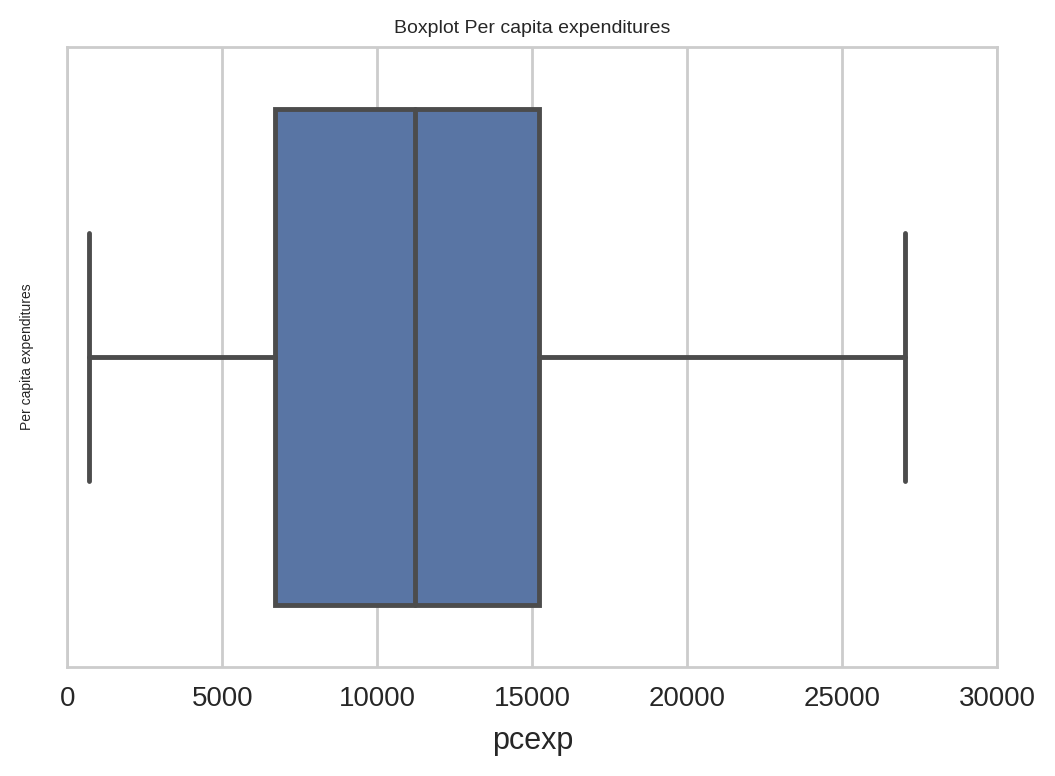

In [23]:
#I create the boxplot using my subset data
fig=plt.figure(figsize=(6,4))
ax=fig.gca()
sns.boxplot(df2['pcexp'], orient='h')
ax.set_ylabel ('Per capita expenditures', fontsize=5)
ax.set_title ('Boxplot Per capita expenditures', fontsize=7)
plt.show()

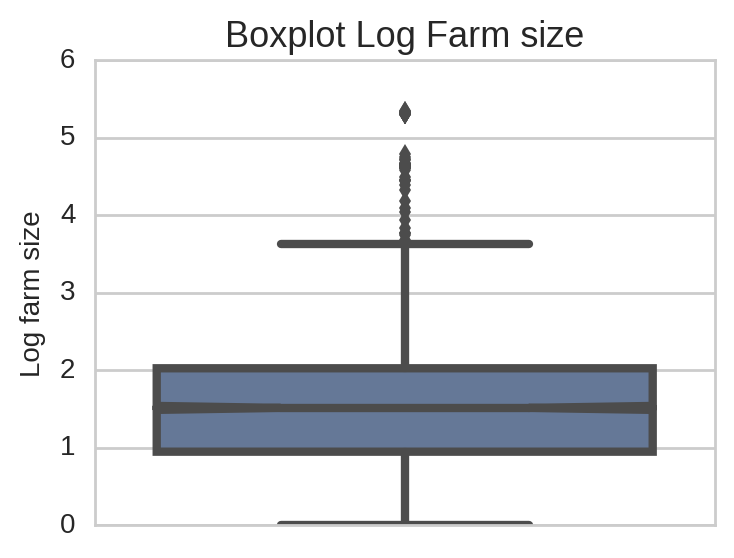

In [139]:
fig = plt.figure(figsize=(4,3))
ax = fig.gca()

sns.boxplot(df.ln_farmsize, orient='v',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Log farm size', fontsize=10)
ax.set_title('Boxplot Log Farm size', fontsize=13)

plt.show()

In [140]:
#We can see that there is presence of outliers for the variable farm size.

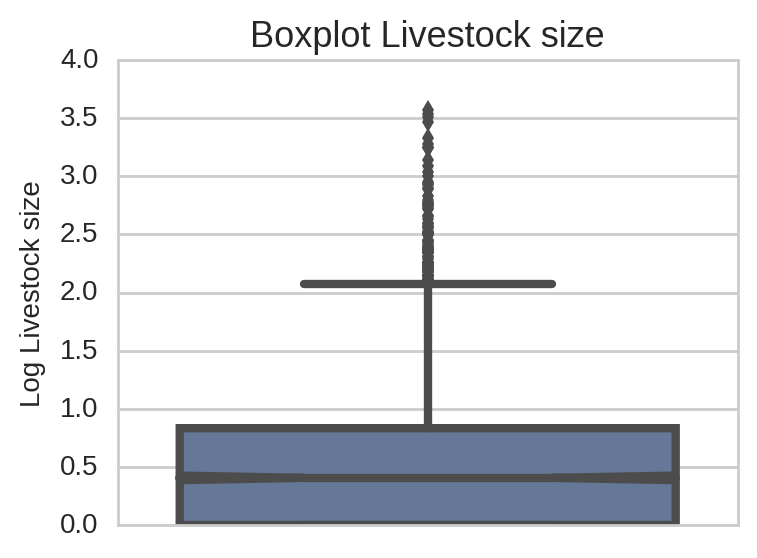

In [143]:
fig = plt.figure(figsize=(4,3))
ax = fig.gca()

sns.boxplot(df.ln_total_livstocksize, orient='v',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Log Livestock size', fontsize=10)
ax.set_title('Boxplot Livestock size', fontsize=13)

plt.show()

In [144]:
#The observations are very concentrated, there is not a big outlier driving the variable. Note: the variable is already log

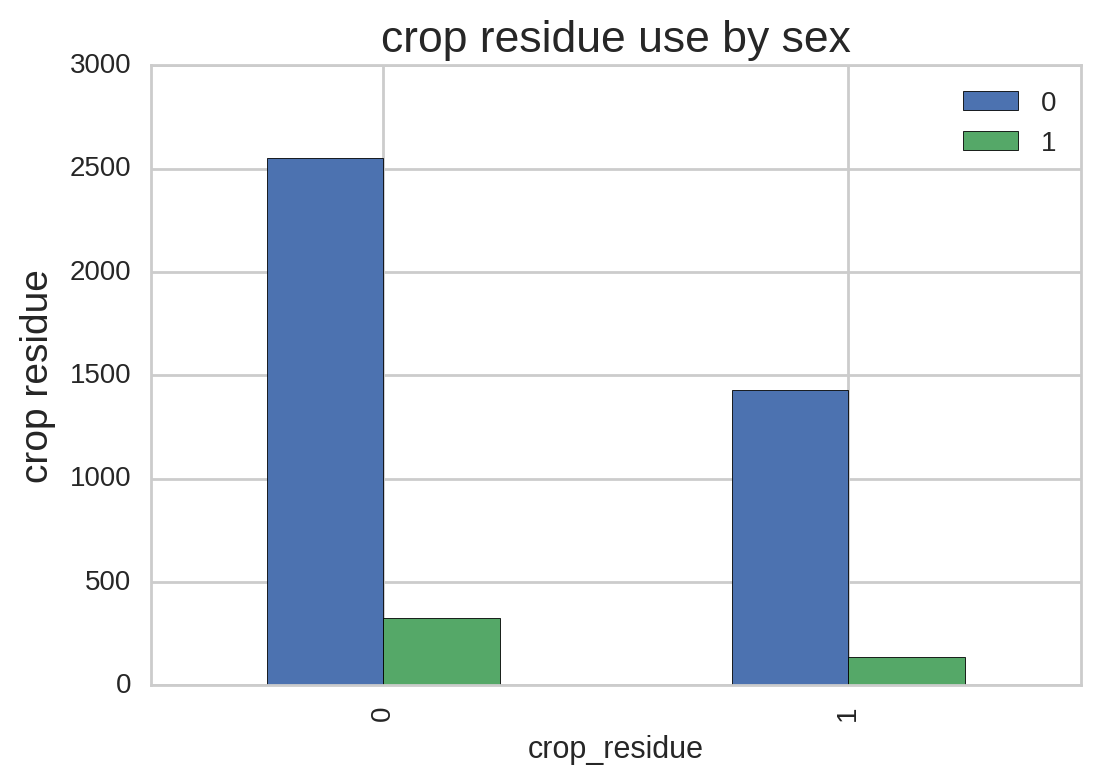

In [92]:
# create a bar that shows which group (men or women) adopted the most crop residue

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
df.groupby(['crop_residue','femhead']).size().unstack().plot(kind="bar", ax=ax)

plt.ylabel("crop residue", fontsize=14)
plt.title('crop residue use by sex', fontsize=16)
plt.legend(loc='upper right')
plt.show()

In [ ]:
#We can see that more males (0) adopted crop residue(1) than female(1)

In [22]:
#This time I'm creating a correlation map to ckeck multicollinearity between my explanatory variables/features. 
#I'm going to use my subset data df2 created above

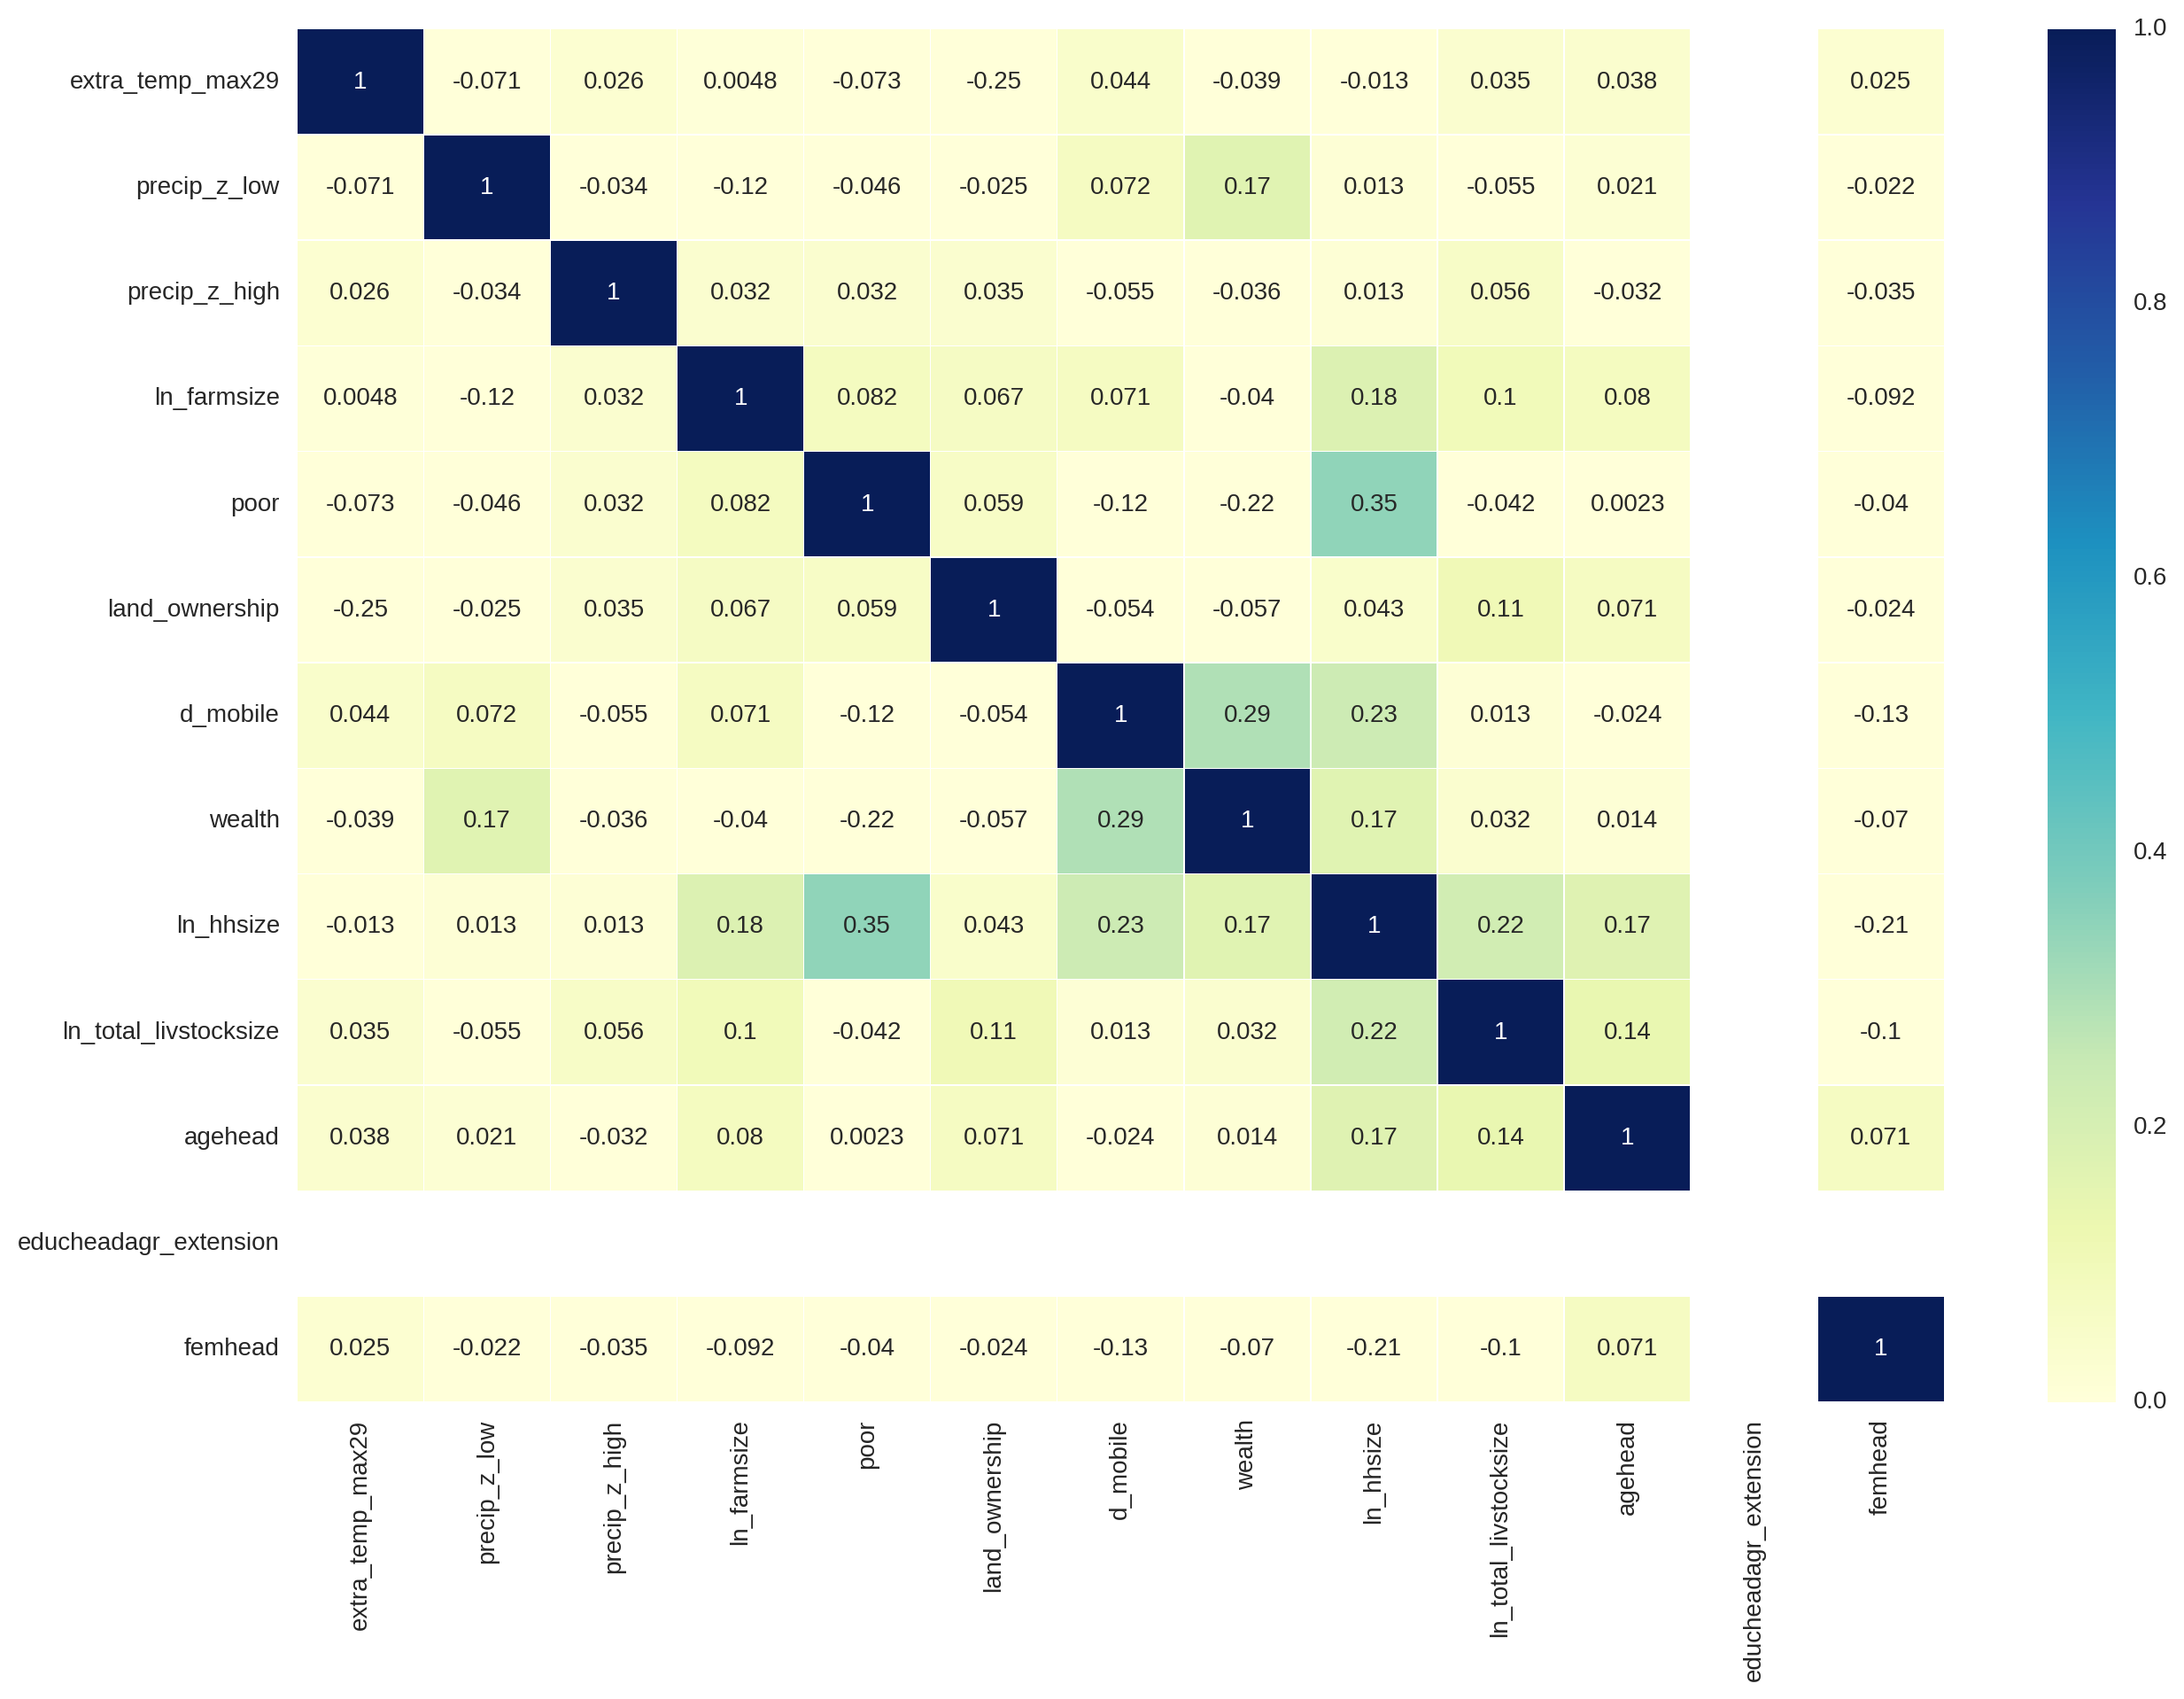

In [93]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
sns.heatmap(df2.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

Interestingly, we can see from the correlation heatmap, that the selected features for my model are not too much correlated. So we should not be worried about multicollinearity issue. One interesting result is the positive correlation between being poor and having a large household size. Also wealthier households seem more like to have a mobile phone.

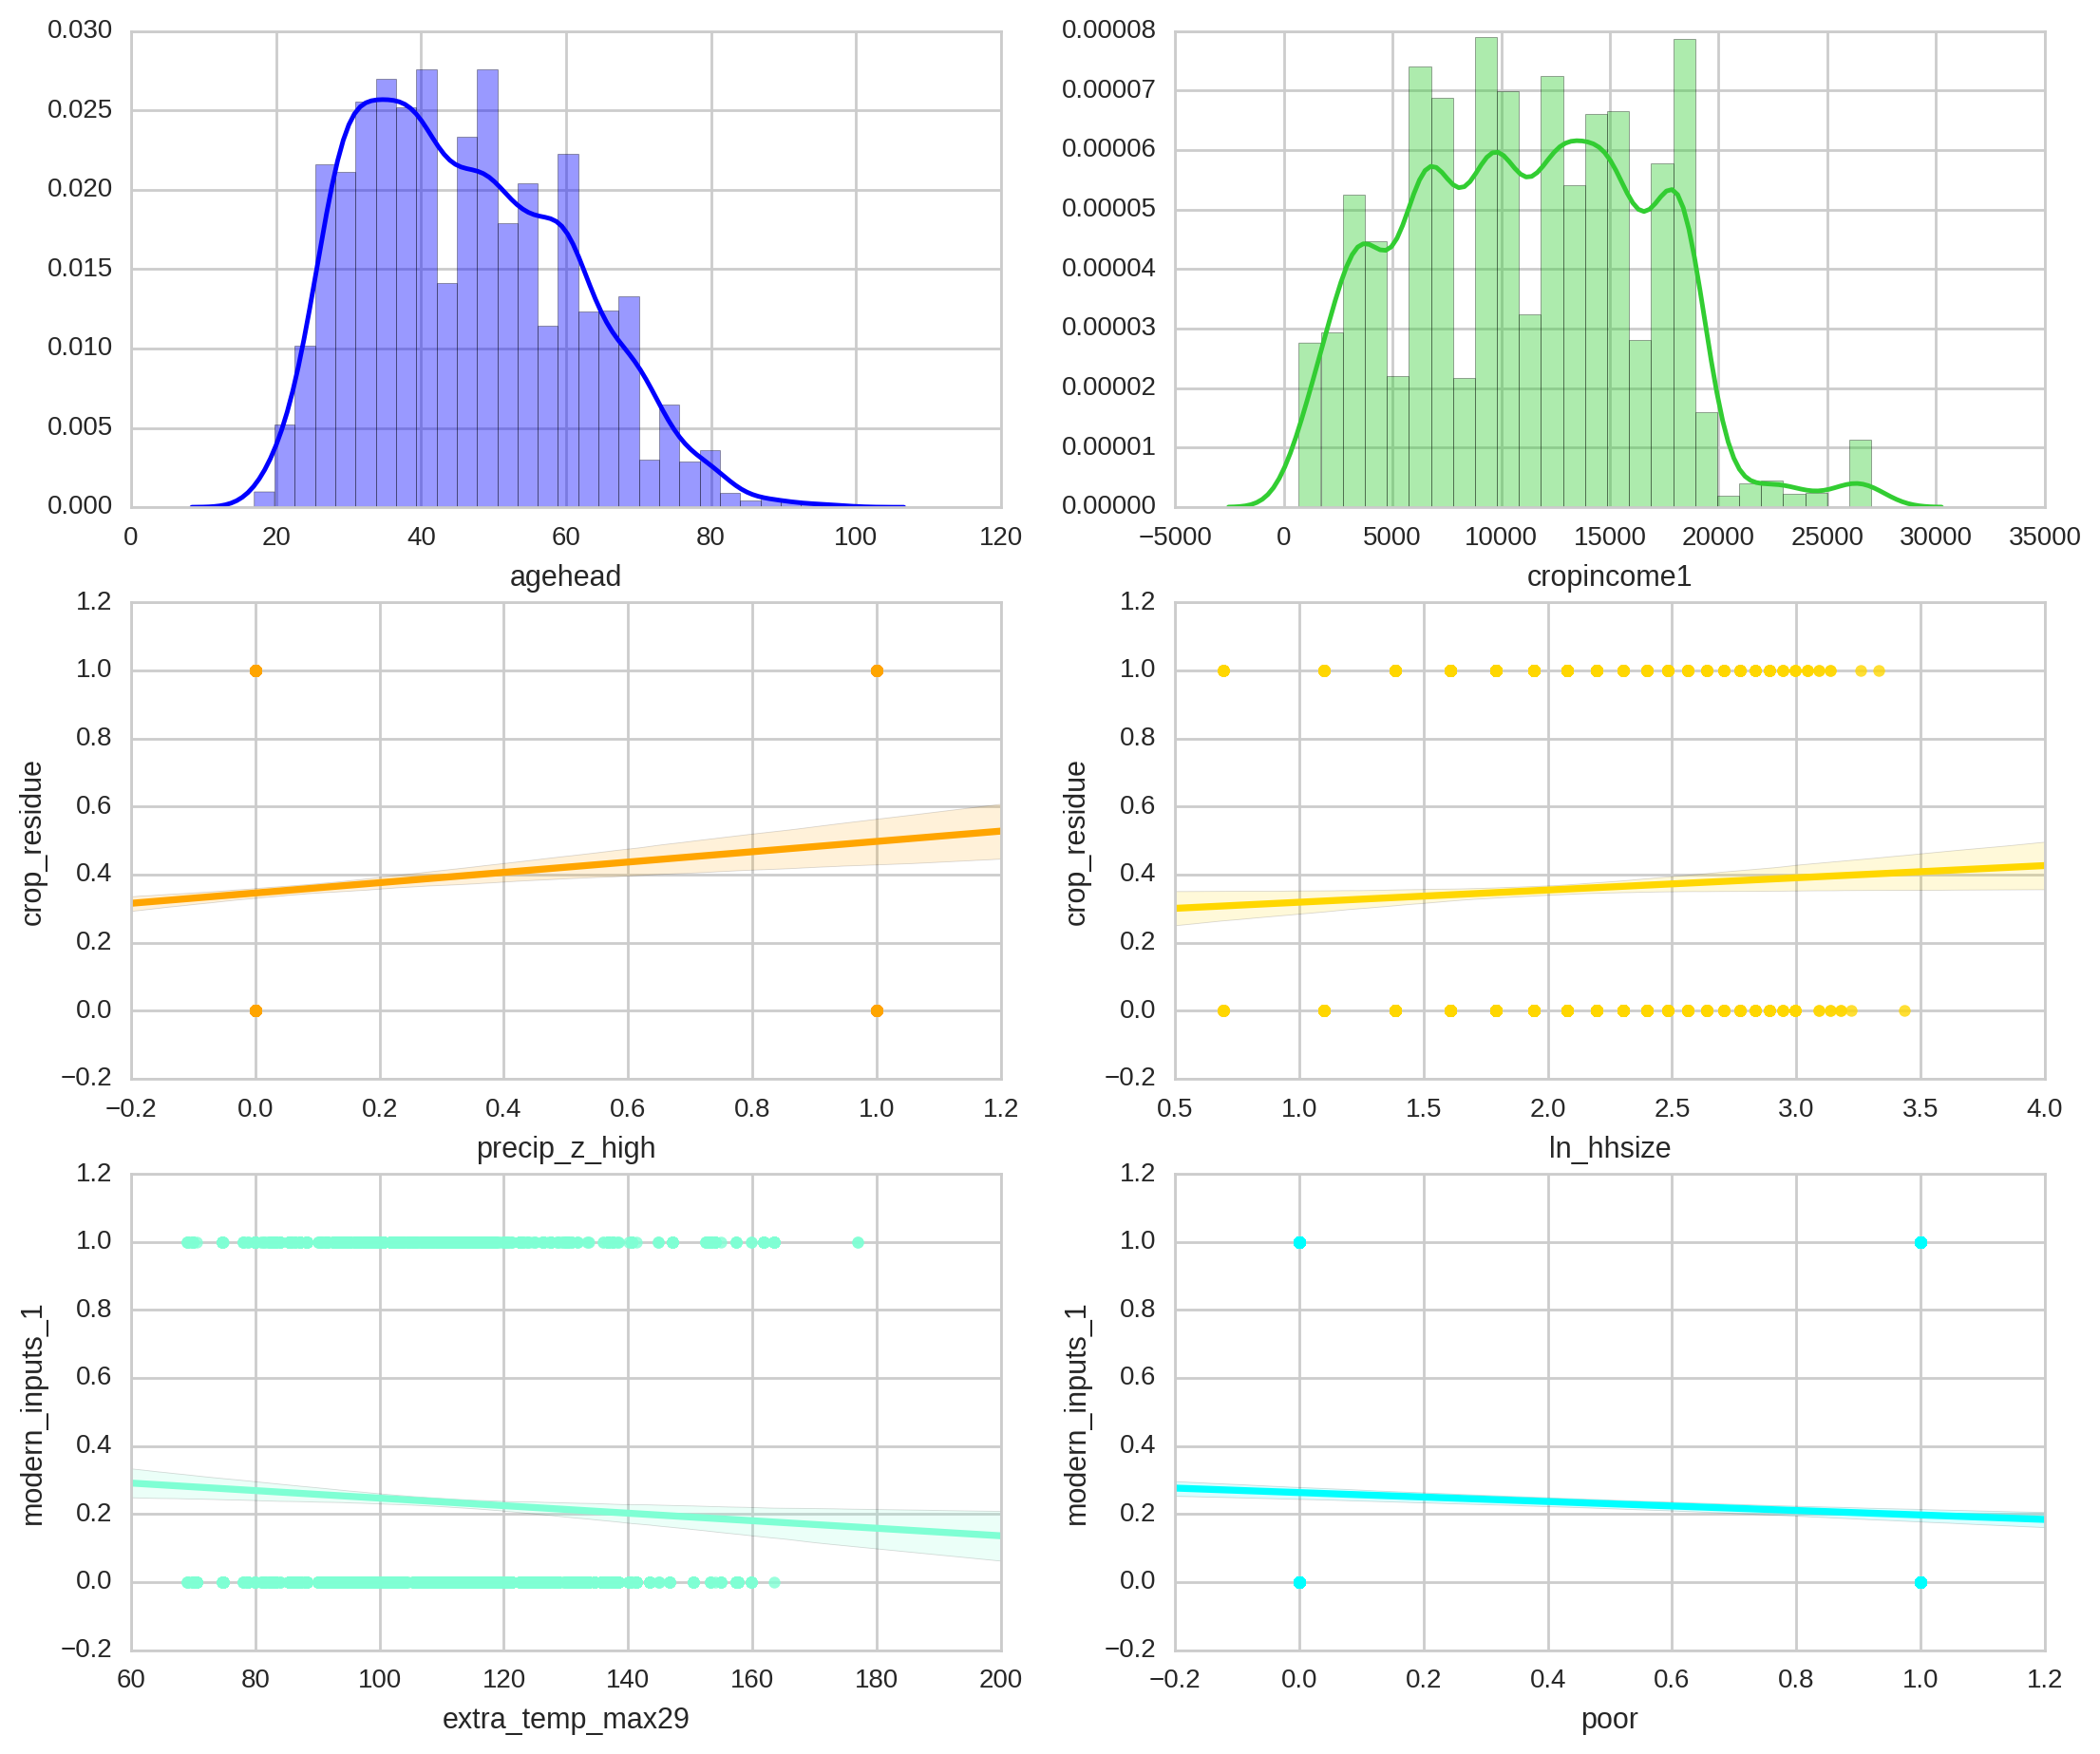

In [157]:
#Creating set of graphs for visualization

fig, axarr = plt.subplots(3, 2, figsize=(13,11),
                         sharex=False, sharey=False)
#This visualizes the age distribution
axarr[0,0] = sns.distplot(df2.agehead ,ax=axarr[0,0], color='blue')

#this visualizes the income distribution
axarr[0,1] = sns.distplot(df.cropincome1 ,ax=axarr[0,1], color='green')     

#Here I want to see relationship between use of modern inputs on the field and the harvest
axarr[1,0] = sns.regplot(df2.precip_z_high,
                      df.crop_residue, ax=axarr[1,0], color='orange')

#Here I want to see the relationship between use of traditional crop residue on the field and the household size
axarr[1,1] = sns.regplot(df2.ln_hhsize,
                      df0.crop_residue, ax=axarr[1,1], color='gold')

#here How's does temperature increase relate to use of modern inputs?
axarr[2,0] = sns.regplot(df.extra_temp_max29,
                       df0.modern_inputs_1, ax=axarr[2,0], color='purple')

#Here, Do richer households seem to adopt more modern inputs?
axarr[2,1] = sns.regplot(df.poor,
                       df0.modern_inputs_1, ax=axarr[2,1], color='red')

plt.show()

Results:

We can see that the majority of farmers in our dataset are between 30-60 years.
Increase in temperature is negatively correlated with modern inputs use. It's expected, since too much sun will burn modern inputs and waste the investment.

Poor households seem to be less likely to adopt modern inputs, since modern inputs require a lot of capital.
When households observe high precipitations(preci_z_high), they are more likely to use crop residue on their field. It might be to protect against water erosion.


# Function Creation for visualization

In [38]:
def correlation_graph(title1, title2, title3, data1, data2):
    
    sns.set(rc={"figure.figsize": (10, 8)})
    sns.set_style('white')
    
    fig, axarr = plt.subplots(2, 2, figsize=(10,8),
                         sharex=False, sharey=False)

    axarr[0,0] = sns.regplot(data1, data2, color="blue", ax=axarr[0,0])
    axarr[0,0].set_title('correlation between ' +title3, fontsize=10)
    
    axarr[0,1] = sns.distplot(data2, color="brown", ax=axarr[0,1])
    axarr[0,1].set_title('plot ' +title2, fontsize=10)
    
    axarr[1,0] = sns.boxplot(data1, orient='v',
             linewidth=2, notch=False, 
            saturation=0.5, ax=axarr[1,0], color="gold")
    axarr[1,0].set_title('Boxplot '+ title1, fontsize=10)
    
    axarr[1,1] = sns.boxplot(data2, orient='v',
             linewidth=3, notch=True, 
            saturation=0.5, ax=axarr[1,1], color="limegreen")
    axarr[1,1].set_title('Boxplot ' +title2, fontsize=10)
    
    print "Python is Awesome, but frustrating to understand, but awesome."

Python is Awesome, but frustrating to understand, but awesome.


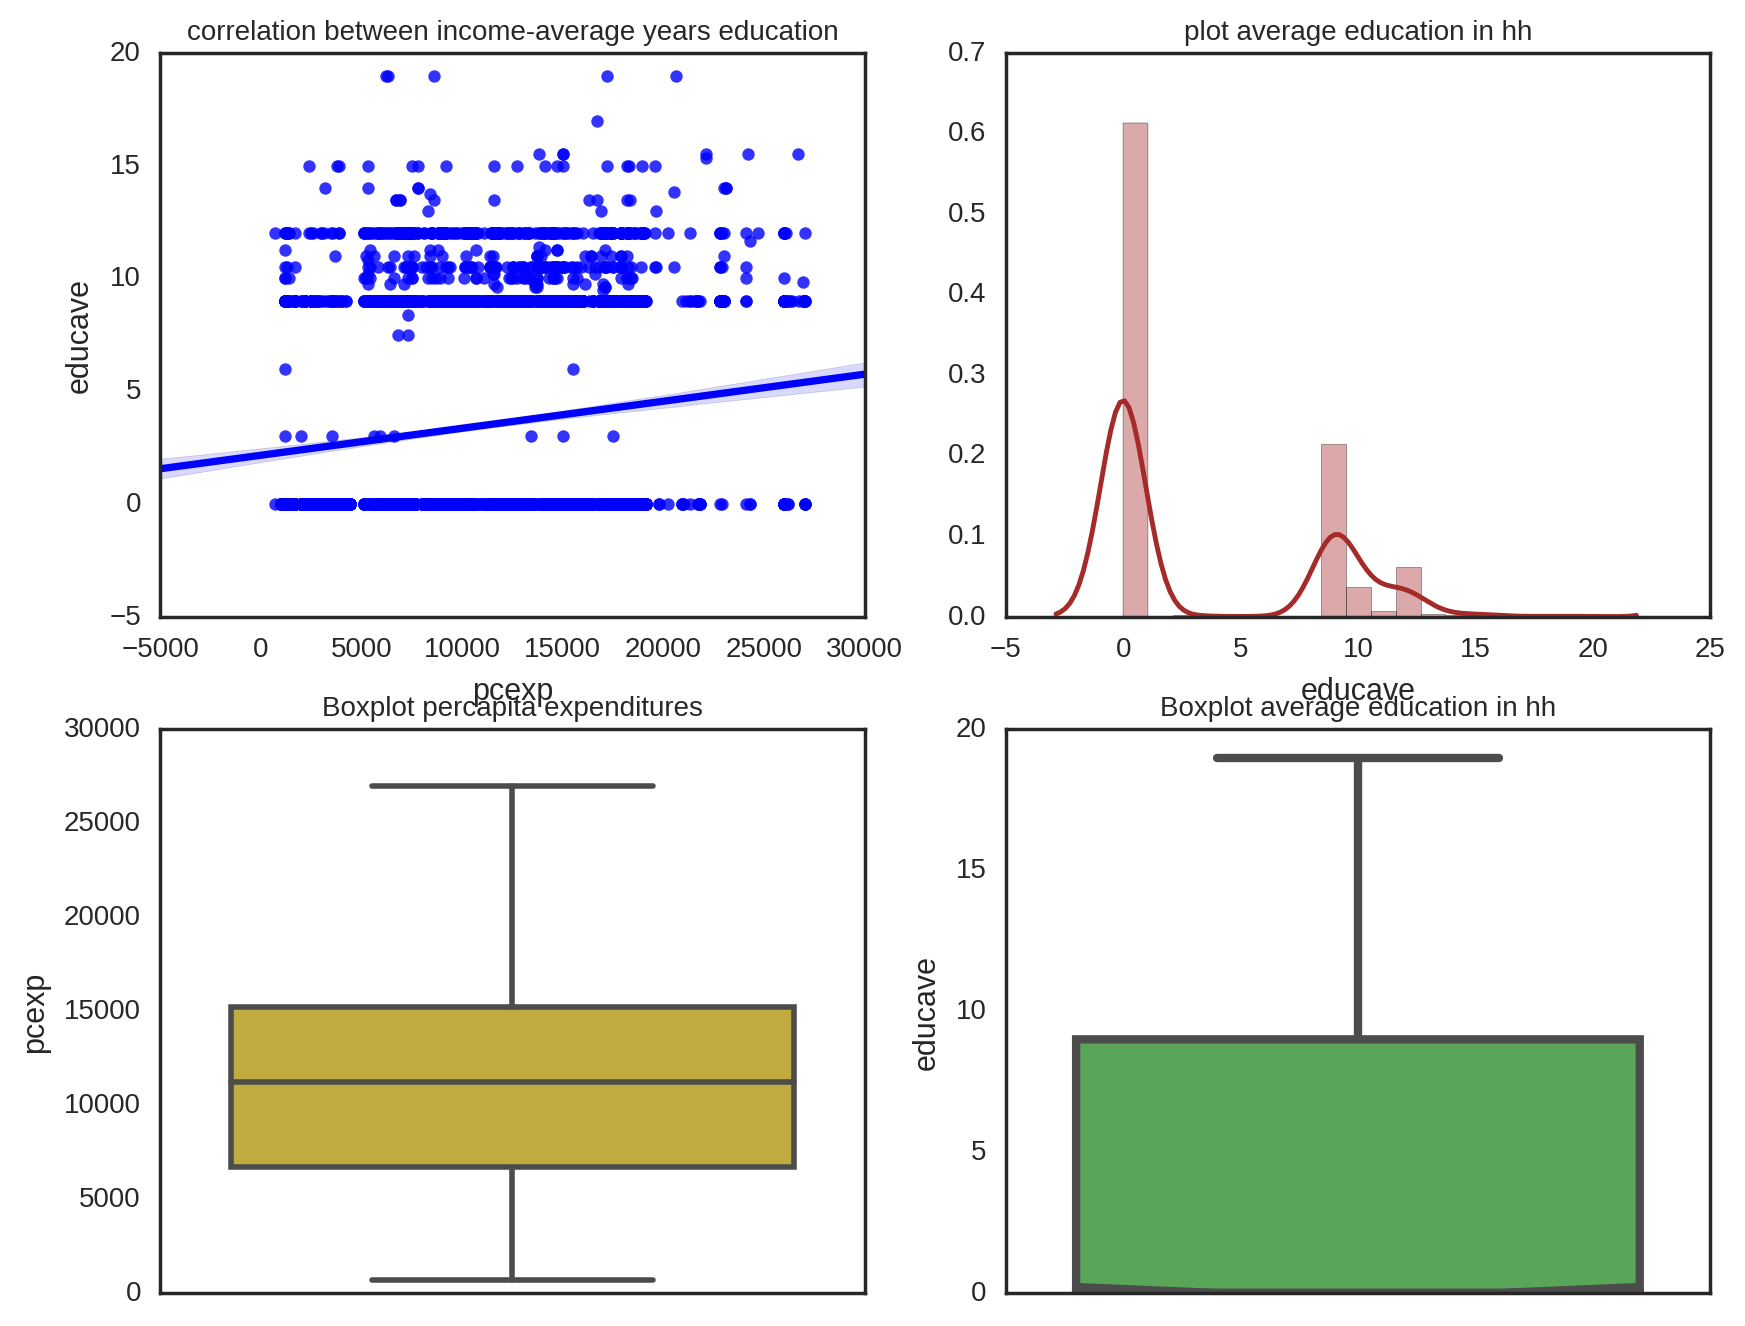

In [39]:
correlation_graph("percapita expenditures", "average education in hh", "income-average years education", df2.pcexp, df.educave)

In [ ]:
#The first graph shows positive relation between household income per capita, and average years of education of household
#The second one shows the distribution of the average years of education.
#The last two show boxplots of the variables.

In [40]:
#Now I can just call the function whenever I need it. AWESOOOOMMMEEEE.

Function below prints out recommendations to farmers based on the weather conditions:

I want to create a function that tests using a poverty line (per capita expenditures whether a household is considered poor or not, and see if they are capable to adapt to climate change
Currency in XFA

1- Per capita expenditures below 165000 : you are poor.

2- Per capita expenditures below 165000 and negative rainfall shocks: Sorry to hear that. You are poor and cannot adopt improved seeds to adapt to drought. You should temporarily migrate to the city.

3- Per capita expenditures below 165000 and posititve rainfall shocks: you are poor, but can use crop residue to get some benefits of the good rain.

4- Per capita expenditures above 165000 : you are rich and can adapt to climate shocks. you should buy improved seeds.

In [48]:
pcap_exp= float(input('What is the household annual per capita expenditures? '))
weather = raw_input('How do you expect the rain be this year?(good or worse)? ')

What is the household annual per capita expenditures? 150000
How do you expect the rain be this year?(good or worse)? worse


In [49]:
    if pcap_exp <165000:
        if weather == 'worse':
            print 'Sorry to hear that. You are poor and cannot adopt improved seeds to adapt to drought. You should temporarily migrate to the city.'
        elif weather == 'good':
            print 'You are poor, but can use crop residues to get some benefits of the good rain.'
    else:
        if weather =='worse':
            print 'Weather is bad, but you can adopt heat resistant seeds to adapt since you are rich.'
        elif weather == 'good':
            print 'Fantastico!!! Since you do not have capital constraints, you should buy more improved seeds to have higher yields and income.'

Sorry to hear that. You are poor and cannot adopt improved seeds to adapt to drought. You should temporarily migrate to the city.


In [50]:
# I still don't know how I can test this on each observation in my sample.

# summary report

I think my dataset is so rich for these reasons:

1 - Niger is the poorest country in the world, and the sample is on poor farmers. Understand how those farmers react to climate change, and what constraint their adoption is important for poverty alleviation.

2- We see from the exploratory analysis that: when there is a positive rainfall shock (heavy rain), farmers are more likely to adopt crop residue. Which makes sense, to protect the soil against erosion.

3- Richer households seem to be more educated.

4- My analysis will not suffer from multicollinearity issue, since there is very little correlation among my features.

5 - Most of the farmers are aged between 30-60 years, and most of the input adopters are males. Maybe there is a gender barrier.

6 - From the groupby analysis, we could see that adopting modern inputs, yields more harvest than the traditional crop residue on the field.

7 - Creating function makes life easier for exploratory analysis.

